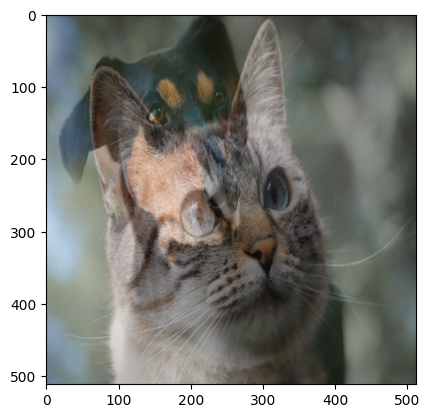

In [2]:
import numpy as np
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt

class Mixup:
    def __init__(self, target, scale, alpha=0.5, beta=0.5):
        self.target = target
        self.scale = scale
        self.alpha = alpha
        self.beta = beta

    def __call__(self, image):
        image = np.array(image)
        target = self.target.resize(self.scale)
        target = np.array(target)
        mix_image = image * self.alpha + target * self.beta
        return Image.fromarray(mix_image.astype(np.uint8))


transform = transforms.Compose(
    [
        transforms.Resize((512, 512)),
        Mixup(
            target=Image.open("dog.jpg"),
            scale=(512, 512),
            alpha=0.5,
            beta=0.5
        )
    ]
)

image = Image.open("cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)